<a href="https://colab.research.google.com/github/keshav123333/Machine_learning_100_campusx/blob/main/regression_rmse_mse/Ridge_Lasso_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**ye wale reg tecnique vo hai jo overfitting or regularizer wali regression bhi kaha sakte ho yaar**

#Ridge reg

is loss =sigma (ypred-yi)^2+lambda*||weight||^2

1. isme wt ki coeff chota krta lagbhag 0 karta exacty 0 ni

In [1]:
import numpy as np
import pandas as pd


In [2]:
x=np.random.rand(100,1)*10
x1=np.random.rand(100,1)*100

y=x*x1+2*x1+x

In [3]:
X=np.hstack((x,x1))

In [4]:
xtr=X[:50,:]
xte=X[50:,:]
ytr=y[:50]
yte=y[50:]


In [5]:
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error,r2_score

In [6]:
rm=Ridge(alpha=0.01)
rm.fit(xtr,ytr)


Ridge(alpha=0.01)

In [7]:
rm.coef_

array([55.08946892,  6.3631771 ])

In [8]:
pred=rm.predict(xte)

In [9]:
r2_score(yte,pred)

0.8228936832996285

you can use polynomial function too

In [10]:
from sklearn.preprocessing import PolynomialFeatures


In [11]:
poly=PolynomialFeatures(degree=2)
xpoly=poly.fit_transform(xtr)
xpolyte=poly.transform(xte)

In [12]:
lrr=Ridge(alpha=0.01)
lrr.fit(xpoly,ytr)

Ridge(alpha=0.01)

In [13]:
pred=lrr.predict(xpolyte)

In [14]:
r2_score(yte,pred)

0.9999999999985096

grdient descent wala ridge mein bas solver extra aa jaa chatgpt check

In [15]:
r1=Ridge(solver="sag")#solver{‘auto’, ‘svd’, ‘cholesky’, ‘lsqr’, ‘sparse_cg’, ‘sag’, ‘saga’, ‘lbfgs’}, default=’auto’ last ke kuch gradinet descent use karte and pehle ke kuch formula use karte hai

# Why Ridge actually work
basically we try to reduce value weights
and ye kaise by like loss ko bada ke so even if hum minima pe tab bhi humara model movement kargea adjust hone ke liye


#Lasso reg

s loss =sigma (ypred-yi)^2+lambda*||weight||


1. isme lasso reg use karte toh feature selction bhi ho jata hai as yaha weight ==0 ho sakta ridge mein ni ho sakta tha


why
lasso mein diamond cut corner hote while ridge mein humare smooth corner hote hai so as ride circle so kahi bhi zero ni hoti value while redge continous and lasso discontinous hota hai

and yaha wt 0 isliye bhi ho jate as ridge mein w^2 dloss=2w and yaha pe w hi rehta so vaise hi zero ho jata and non diff



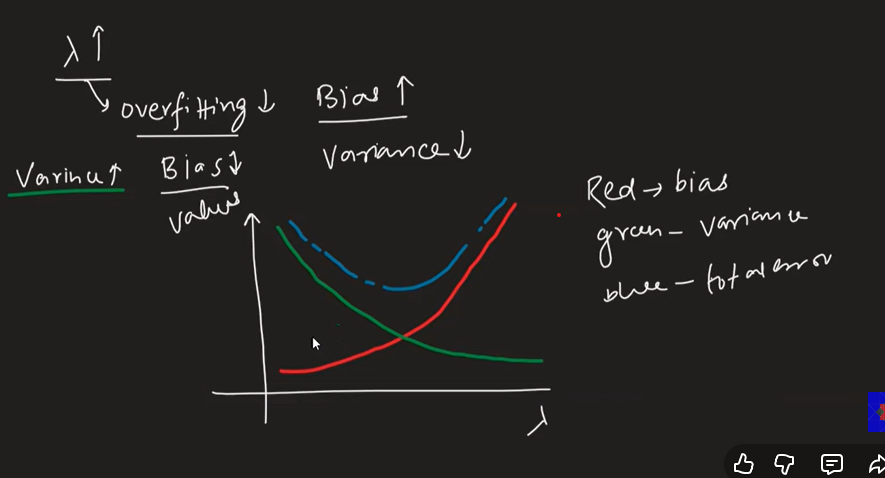

yaha upar image mein dekh jaise lambda badge toh lasso ridge donomein variance kam hoga and bias badega and hume ek perfect value labda ki rakhni hai vaise jaydatar ye dono ke intersect se pehle ki jagah ko lete


lambda and train loss and val loss

0.8373254103495964  labmda 0.001
0.8373255543320692  labmda 0.0014873521072935117
0.8373257684819799  labmda 0.00221221629107045
0.8373260869922763  labmda 0.0032903445623126675
0.8373265607159086  labmda 0.004893900918477494
0.8373272652802672  labmda 0.007278953843983154
0.8373283131503267  labmda 0.010826367338740546
0.8373298715577833  labmda 0.01610262027560939
0.8373321891392244  labmda 0.02395026619987486
0.8373356354928349  labmda 0.03562247890262444
0.8373407598724172  labmda 0.0529831690628371
0.8373483781748707  labmda 0.07880462815669913
0.837359701633198  labmda 0.11721022975334805
0.837376526707704  labmda 0.1743328822199989
0.8374015141617475  labmda 0.2592943797404667
0.837438596729229  labmda 0.38566204211634725
0.837493569102674  labmda 0.5736152510448681
0.837574929431101  labmda 0.8531678524172814
0.8376950517694296  labmda 1.2689610031679235
0.8378717565658976  labmda 1.8873918221350976
0.8381302687282803  labmda 2.8072162039411785
0.8385053127010856  labmda 4.1753

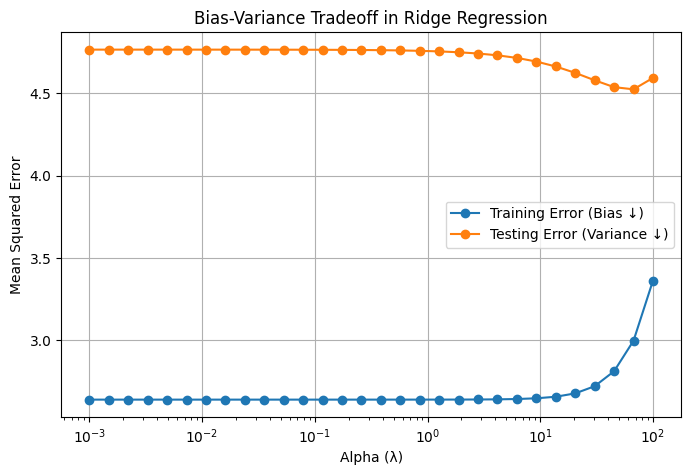

In [16]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import Ridge
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,r2_score

# Step 1: Dummy data
np.random.seed(42)
X = np.linspace(0, 10, 100).reshape(-1, 1)
y = 2 * X.squeeze() + np.random.randn(100) * 2  # y = 2x + noise

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

# Step 2: Try different alpha values
alphas = np.logspace(-3, 2, 30)
train_errors, test_errors = [], []

for a in alphas:
    ridge = Ridge(alpha=a)
    ridge.fit(X_train, y_train)
    train_pred = ridge.predict(X_train)
    test_pred = ridge.predict(X_test)
    print(r2_score(y_test,test_pred)," labmda",a)

    train_errors.append(mean_squared_error(y_train, train_pred))
    test_errors.append(mean_squared_error(y_test, test_pred))

# Step 3: Plot bias-variance tradeoff
plt.figure(figsize=(8,5))
plt.plot(alphas, train_errors, label="Training Error (Bias ↓)", marker='o')
plt.plot(alphas, test_errors, label="Testing Error (Variance ↓)", marker='o')
plt.xscale("log")
plt.xlabel("Alpha (λ)")
plt.ylabel("Mean Squared Error")
plt.title("Bias-Variance Tradeoff in Ridge Regression")
plt.legend()
plt.grid(True)
plt.show()


why lasso mein wt =0 and yaha ni


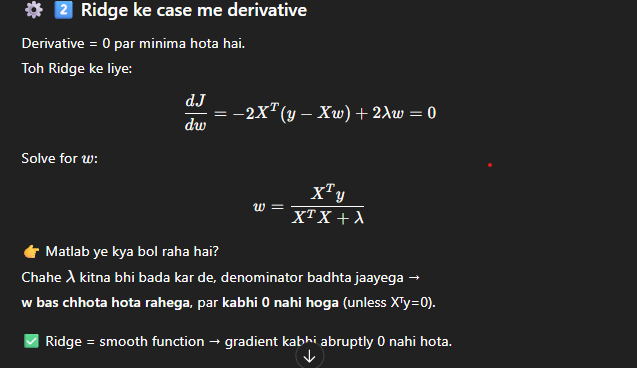

and in lass mod toh direct diff ni ho sakta and like rdge mein lambda ko kitna bhi ghta bada le weight kabhi zero ho hi ni sakta but ye usme aisa case ni


lasso mein vo if lambda bada so loss ko ghatne ke liye direct weight hi ghata deta hai jo weight chota hota hai unhe gahta deta hai ki kyon rakhu

 ​

why lasso create sparsity  as weigth 0 ho jate ridge mein lamda wt ka reln main denominator mein aata hai and vo zero ni karwa pata weight ko lasso mein lambda numerator mein atta and zero bhi karwa deta hai weight ko and create sparsity video for more and

#elastic net reg


loss==sigma (ypred-yi)^2+ a*||weight||^2+ b||w||

a+b=lambda   

a=0.5,b=0.5 as dono barabar laga
l1_ratio ke control karke ye maan if isse 0.9 karo toh a 90percent lagta chagpt kar le

when to use
1. multicolinearity ho tab lagao means inut ke bich zayda similarity hai


In [41]:
from sklearn.linear_model import ElasticNet


In [42]:
xtrain=np.random.rand(100,1)*1000
ytrain=xtrain**3+xtrain+89

In [43]:
xtest=np.random.rand(100,1)
ytest=xtest**3+xtest+89

In [44]:
pol=PolynomialFeatures(degree=70)
xtrain=pol.fit_transform(xtrain)
xtest=pol.fit_transform(xtest)

In [45]:
reg=ElasticNet(alpha=1,l1_ratio=0.7)#0.7 means ridge ko 70 percent 30 percent ridge

In [46]:
reg.fit(xtrain,ytrain)

/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_coordinate_descent.py:695: RuntimeWarning: overflow encountered in square
  model = cd_fast.enet_coordinate_descent(


ElasticNet(alpha=1, l1_ratio=0.7)

In [47]:
pred=reg.predict(xtest)

In [48]:
r2_score(ytest,pred)

-126046235406202.5